In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import rental_utils
from rental_utils import *; reload(rental_utils)

<module 'rental_utils' from 'rental_utils.pyc'>

In [2]:
train = pd.read_json('Data/train.json')

In [3]:
ny = gpd.read_file("Data/ZillowNeighborhoods-NY/ZillowNeighborhoods-NY.shp")
nyc = ny[ny['City']=='New York'][['County', 'Name', 'RegionID', 'geometry']]
nyc

,County,Name,RegionID,geometry
2,Queens,Rego Park,6719,POLYGON ((-73.85629999999999 40.72303000000012...
5,Queens,Belle Harbor,10329,POLYGON ((-73.85618223699993 40.56810940300005...
10,New York,Roosevelt Island,20239,POLYGON ((-73.96143117599991 40.74851331600007...
13,Queens,Howard Beach,21970,POLYGON ((-73.85608525799972 40.65037135900031...
16,Queens,Breezy Point,37557,POLYGON ((-73.90962826099991 40.56552556300005...
21,Queens,Neponsit,42662,POLYGON ((-73.85990620999991 40.56700771800007...
23,Queens,East Elmhurst,45032,POLYGON ((-73.86286955999992 40.76695847800005...
25,Bronx,West Farms,48417,POLYGON ((-73.87729106686085 40.84245433729515...
27,Queens,Cambria Heights,50348,POLYGON ((-73.73909357074226 40.70117794641342...
33,Queens,Fresh Meadows,4819,POLYGON ((-73.76991237739721 40.74150740314482...


In [4]:
locations = add_region(train)
locations.head()

,listing_id,geometry,County,Name,RegionID
4,7170325,POINT (-73.9539 40.7108),Kings,Williamsburg,199001
6,7092344,POINT (-73.9722 40.7513),New York,Turtle Bay,270953
9,7158677,POINT (-73.96250000000001 40.7575),New York,Sutton Place,270946
10,7211212,POINT (-73.9425 40.7145),Kings,Williamsburg,199001
15,7225292,POINT (-73.9743 40.7439),New York,Gramercy,273860


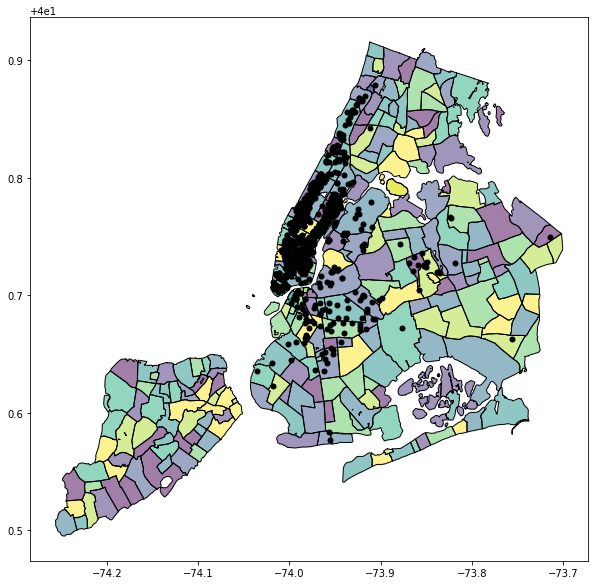

In [10]:
plot_locations = gpd.GeoDataFrame(locations.iloc[:1000])
plot_locations = plot_locations.loc[~pd.isnull(plot_locations['RegionID'].values)]

fig, ax = plt.subplots(1, figsize=(10,10))
nyc.plot(ax=ax)
plot_locations.plot(ax=ax, color="black", markersize=5)

In [7]:
locations.loc[pd.isnull(locations['RegionID'].values)]

,listing_id,geometry,County,Name,RegionID
624,7166766,POINT (-74.03189999999999 40.7274),NaN,NaN,NaN
872,7143730,POINT (-71.07940000000001 42.3459),NaN,NaN,NaN
928,7206346,POINT (-74.0311 40.7276),NaN,NaN,NaN
2028,7087715,POINT (0 0),NaN,NaN,NaN
3032,7094296,POINT (-74.0311 40.7492),NaN,NaN,NaN
4719,7221153,POINT (-73.4662 42.8724),NaN,NaN,NaN
4757,7094342,POINT (-74.0311 40.7492),NaN,NaN,NaN
5307,7166771,POINT (-74.0311 40.7492),NaN,NaN,NaN
5560,7152474,POINT (-73.7837 40.9094),NaN,NaN,NaN
6030,7150483,POINT (-73.85720000000001 40.9074),NaN,NaN,NaN
